In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import pandas as pd
from layers import InputToCx, CxMO, FreeSpacePropagation, CxD2NNIntensity, CxD2NNMNISTDetector, ImageResize, Detector

print("TensorFlow:", tf.__version__)
print("Python:", sys.version)
print("OpenCV:", cv2.__version__)

plt.rcParams['font.size'] = 18

TensorFlow: 2.8.0
Python: 3.8.11 (default, Aug 16 2021, 12:04:33) 
[Clang 12.0.0 ]
OpenCV: 4.5.2


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
shape = (28, 28)
inputs = tf.keras.Input(shape)
x = Detector(10)(inputs)

model = tf.keras.models.Model(inputs, x)
model.summary()

pred = model.predict(x_train)
pred.shape

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 detector (Detector)         (None, 10)                0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


2022-03-16 10:52:56.803085: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-16 10:52:56.803465: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-16 10:52:57.203302: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-16 10:52:57.246689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(60000, 10)

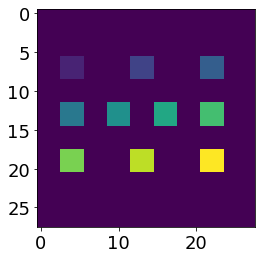

In [6]:
model.layers[-1].plot_area((28, 28))

In [8]:
inp = np.zeros((10, 28, 28))
inp[:, 0:14, :] = 1
pred = model.predict(inp)
pred.shape

(10, 10)

<BarContainer object of 10 artists>

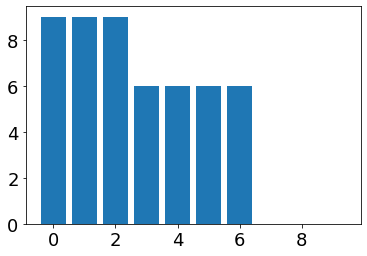

In [9]:
plt.bar(range(10), pred[0,:])

In [6]:
test = np.zeros((10, 10, 10))
w = np.zeros((10, 10, 10))
for i in range(10):
    test[i, i, i] = 1
    w[i, i, i] = 1

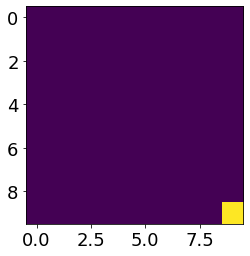

In [27]:
plt.imshow(test[9,:,:])